<img src="https://devra.ai/analyst/notebook/3028/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">  <div style="font-size:150%; color:#FEE100"><b>Board Games Analysis and Prediction</b></div>  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>Board games are more than simple pastimes; they provide a rich dataset of strategies, design intricacies, and human preferences. In this notebook, we explore an extensive board games dataset, examine correlations between various game features, and even build a predictor for average ratings. If you find this analysis useful, please upvote it.

## Table of Contents

- [Data Loading and Exploration](#Data-Loading-and-Exploration)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Board Game Prediction](#Board-Game-Prediction)
- [Future Work and Conclusion](#Future-Work-and-Conclusion)

In [1]:
'''Original Code Include in Base Visualization'''
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

# For our prediction tasks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print('Libraries imported successfully.')

Libraries imported successfully.


In [8]:
'''Original Code Include in Base Visualization'''

# Data Loading (Code Adjusted for visualization change)
csv_file = 'boardgame-geek-dataset_organized.csv'
json_file = 'boardgamegeek.json'

# Read the organized CSV dataset
df = pd.read_csv(csv_file, encoding='utf-8')

# Read the JSON dataset if needed
df_json = pd.read_json(json_file)

print('CSV and JSON files loaded successfully.')

CSV and JSON files loaded successfully.


## Data Loading and Exploration

Now that the data is loaded, we explore its basic structure. We have two data files; the CSV file is organized for ease of analysis and the JSON provides additional raw information. For this notebook, the CSV serves as our primary dataset.

In [14]:
'''Original Code Include in Base Visualization'''


# Quick look into the data
print('DataFrame shape:', df.shape)
print('Columns:', df.columns.tolist())

# Display first few rows to understand the data layout
df.head()

DataFrame shape: (2000, 57)
Columns: ['row_id', 'boardgame', 'release_year', 'min_players', 'max_players', 'min_playtime', 'max_playtime', 'minimum_age', 'avg_rating', 'num_ratings', 'complexity', 'rank_overall', 'owned', 'wishlisted', 'total_plays', 'fans', 'page_views', 'amazon_price', 'std_deviation', 'comments', 'monthly_plays', 'previously_owned', 'for_trade', 'want_trade', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5', 'rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10', 'categories', 'mechanics', 'families', 'designers', 'artists', 'publishers', 'solo_designers', 'developers', 'graphic_designers', 'sculptors', 'editors', 'writers', 'insert_designers', 'rank_strategy', 'rank_thematic', 'rank_family', 'rank_war', 'rank_customizable', 'rank_abstract', 'rank_party', 'rank_childrens', 'url', 'description']


,row_id,boardgame,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,...,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens,url,description
0,1,Brass: Birmingham,2018,2,4,60,120,14,8.575,53548,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/224517/bra...,"Build networks, grow industries, and navigate ..."
1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,13,8.512,56071,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/161936/pan...,Mutating diseases are spreading around the wor...
2,3,Ark Nova,2021,1,4,90,150,14,8.539,54528,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/342942/ark...,"Plan and build a modern, scientifically manage..."
3,4,Gloomhaven,2017,1,4,60,120,14,8.557,65443,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/174430/glo...,Vanquish monsters with strategic cardplay. Ful...
4,5,Twilight Imperium: Fourth Edition,2017,3,6,240,480,14,8.572,26686,...,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/233078/twi...,"Build an intergalactic empire through trade, r..."


## Data Cleaning and Preprocessing

In this section, we handle missing values and verify that numeric fields are formatted correctly. Note that dates are not explicitly present here, except for the release year; thus, no additional date parsing is necessary. Quite often, one might encounter errors when dealing with null values in predictor columns, so we ensure to drop or impute missing values as needed.

In [19]:
'''Original Code Include in Base Visualization'''

# Inspect missing values and data types
print('Missing values per column:')
print(df.isnull().sum())

# For predictor building and most analyses, drop rows with missing critical values
cols_to_check = ['min_players', 'max_players', 'min_playtime', 'max_playtime', 
                 'minimum_age', 'avg_rating', 'num_ratings', 'complexity']
df_clean = df.dropna(subset=cols_to_check)

print('Shape after cleaning:', df_clean.shape)

Missing values per column:
row_id                  0
boardgame               0
release_year            0
min_players             0
max_players             0
min_playtime            0
max_playtime            0
minimum_age             0
avg_rating              0
num_ratings             0
complexity              0
rank_overall            0
owned                   0
wishlisted              0
total_plays             0
fans                    0
page_views              0
amazon_price          882
std_deviation           0
comments                0
monthly_plays           0
previously_owned        0
for_trade               0
want_trade              0
rating_1                0
rating_2                0
rating_3                0
rating_4                0
rating_5                0
rating_6                0
rating_7                0
rating_8                0
rating_9                0
rating_10               0
categories              5
mechanics               3
families               11
designers  

## Exploratory Data Analysis

Let's dive into some visualizations. We will explore correlations between numeric features, distributions for key variables, and counts for categorical-like variables. These plots not only help in understanding the intricate relationships but may also highlight issues or trends worth investigating further. As always, note that visualizations can sometimes reveal more than just numbers—they often expose the beauty (or the mess) within the data.

In [ ]:
# Create a subset of df containing cols user selected
'''Code we adjusted to change the visualization'''

import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings

#store list of all numeric based dataypes for dropdown menu
numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()

#create multi-select widget to allow user to select multiple columns for heatmap
multi_select = widgets.SelectMultiple(
    options = numeric_cols,
    description = "Select multiple columns to be in Heatmap:",
    value = ["avg_rating","amazon_price","complexity"],
    layout=widgets.Layout(height="180px", width="300px")
)

#add some error handling here

#setting widget output area(cols user selects)
widget_output = widgets.Output()

def update_heatmap(change):
    selected_cols = list(change["new"])

    # clear previous plot
    with widget_output:
        clear_output(wait=True)

    if len(selected_cols) < 2:
        with widget_output:
            print("Warning: Please select at least 2 columns.")
        return

    # compute correlation
    corr = df_clean[selected_cols].corr()

    # dynamic figure size
    n = len(selected_cols)
    fig_size = max(8, n * 0.8)

    # create new figure & axis
    plt.close('all')
    fig, ax = plt.subplots(figsize=(fig_size, fig_size))

    # Draw heatmap
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        square=True,
        linewidths=0.5,
        linecolor="lightgray",
        cbar_kws={"shrink": 0.8},
        ax=ax
    )

    # Styling
    ax.set_title(f"Correlation Heatmap – {', '.join(selected_cols)}", 
                 fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()

    # show inside widget
    with widget_output:
        plt.show()

# linking multiselect widget changes to heatmap function
multi_select.observe(update_heatmap,names='value') 


# initial display of widget
update_heatmap({'new':multi_select.value})

display(widgets.VBox([multi_select,widget_output])) #display vertical layout of multi_select widget and its output



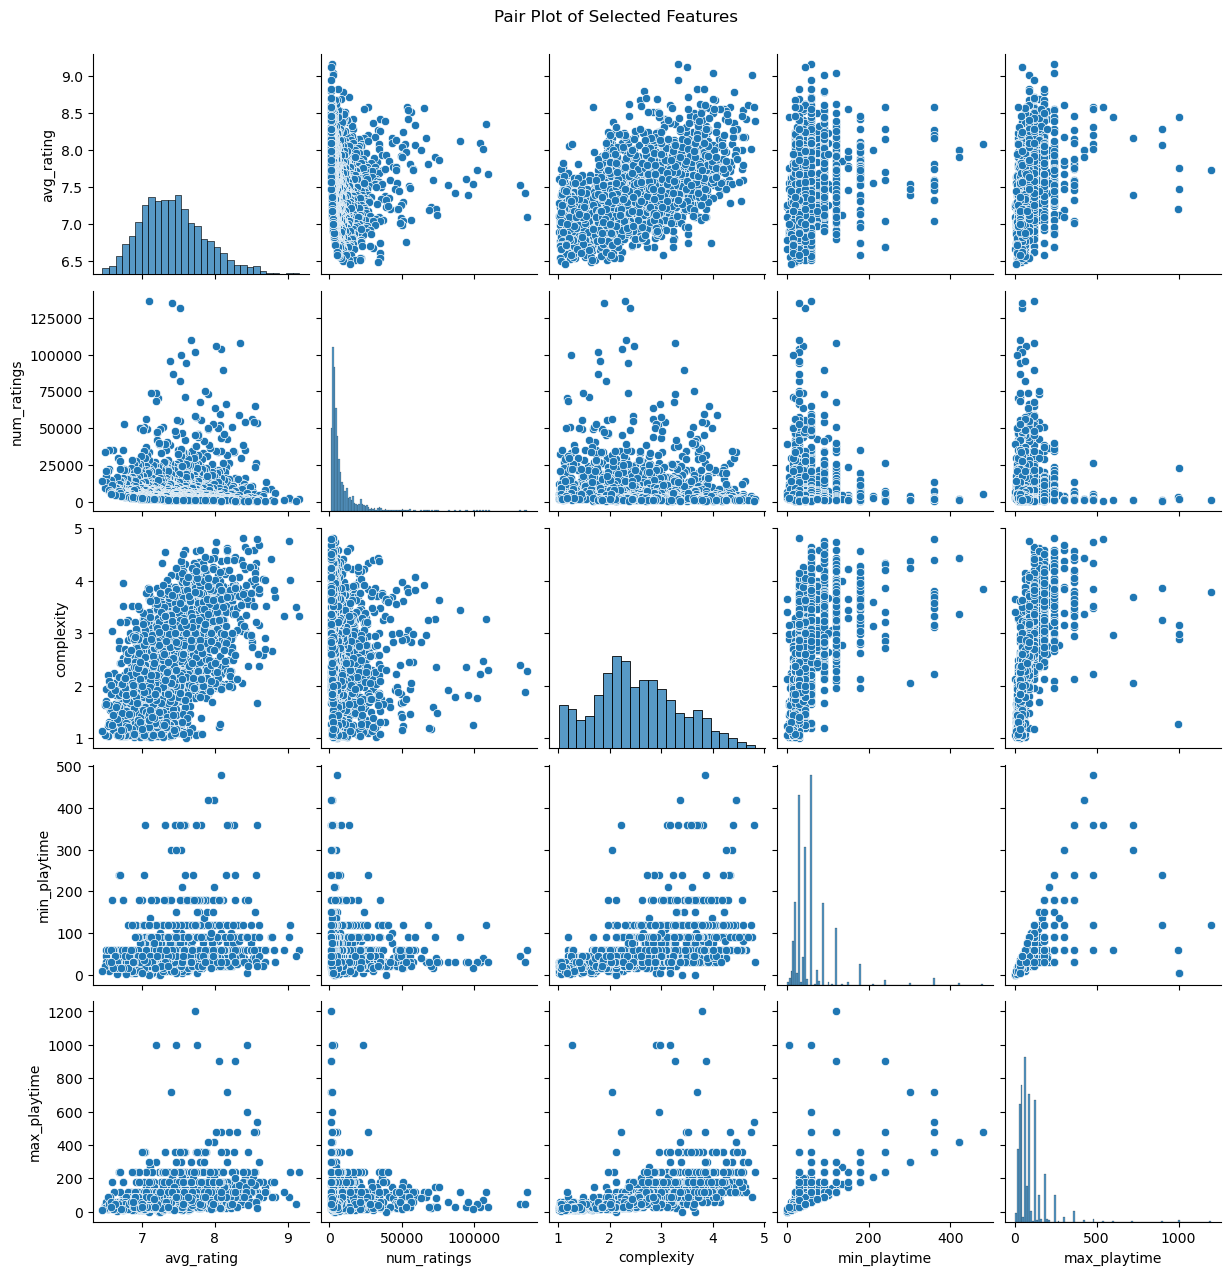

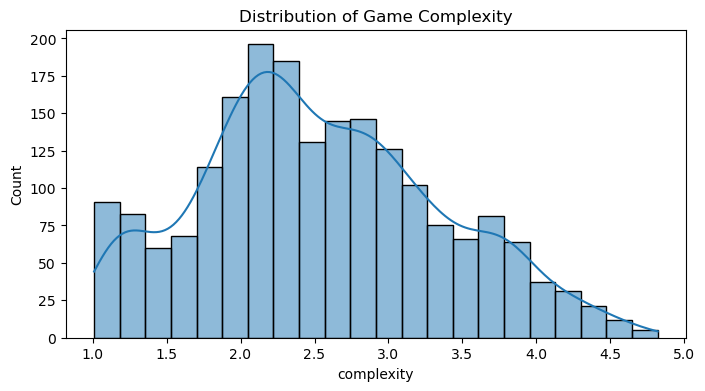

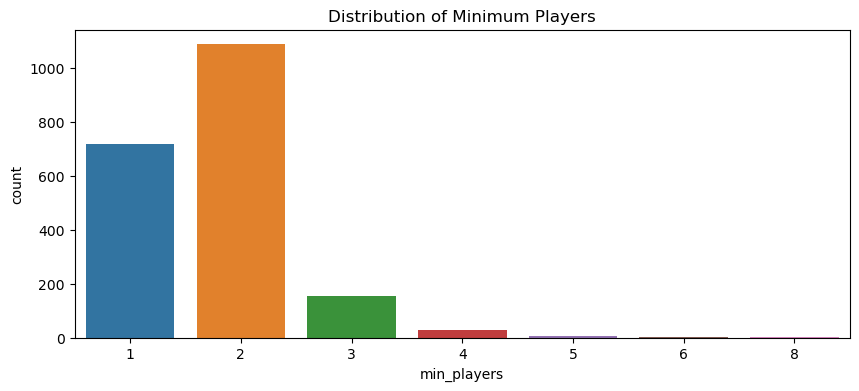

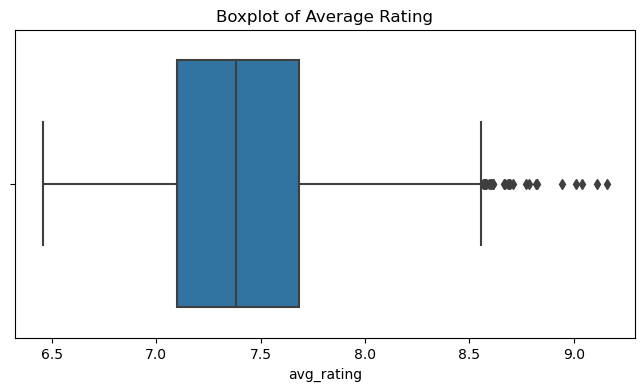

In [54]:

# Pair Plot for a sample of numeric columns (this can be verbose with many columns)
sample_cols = ['avg_rating', 'num_ratings', 'complexity', 'min_playtime', 'max_playtime']
sns.pairplot(df_clean[sample_cols])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

# Histogram for the complexity distribution
plt.figure(figsize=(8,4))
sns.histplot(df_clean['complexity'].dropna(), kde=True)
plt.title("Distribution of Game Complexity")
plt.show()

# Count plot for minimum players
plt.figure(figsize=(10,4))
sns.countplot(x='min_players', data=df_clean)
plt.title("Distribution of Minimum Players")
plt.show()

# Box plot for average ratings
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['avg_rating'])
plt.title("Boxplot of Average Rating")
plt.show()


## Board Game Prediction

In a quest to predict the average rating of a board game, we create a predictor using selected features. Our intuition is that factors such as playtime, number of players, minimum age, and the overall complexity may influence how a game is rated. While our approach is a simple linear regression, it is often surprising how much insight can be gained from an elementary model. There may be more sophisticated techniques in the future, but humility (and dry wit) reminds us that sometimes the simplest approach is the best starting point.

Linear Regression R2 Score: 0.27942352051539354


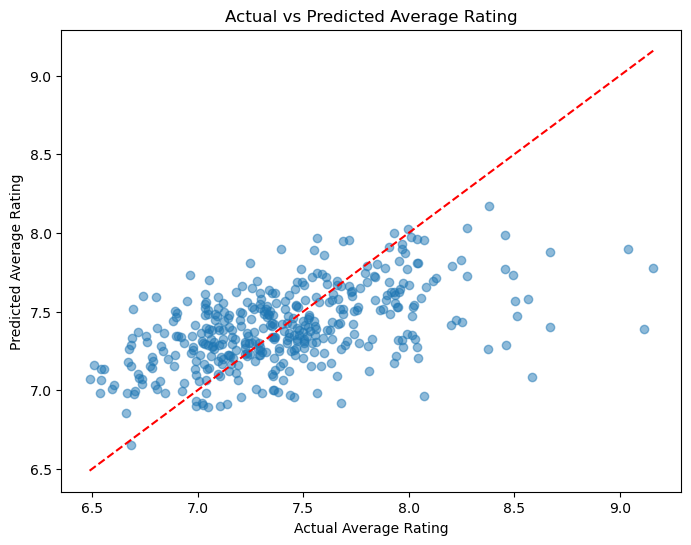

In [55]:
# Select features and target for prediction
features = ['min_players', 'max_players', 'min_playtime', 'max_playtime',
            'minimum_age', 'complexity', 'num_ratings']
target = 'avg_rating'

# Ensure we have complete data for the chosen features
df_model = df_clean[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set and calculate R2 score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)

print('Linear Regression R2 Score:', r2)

# Display a simple scatter plot of actual vs predicted ratings
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Average Rating')
plt.ylabel('Predicted Average Rating')
plt.title('Actual vs Predicted Average Rating')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Future Work and Conclusion

This notebook provided an exploratory analysis of a complex board games dataset. We cleaned the data, visualized relationships between various features using heatmaps, pair plots, histograms, and box plots, and built a simple predictor for average ratings. The use of a linear regression model was a first step; future work could involve more advanced algorithms, feature engineering, and text analytics from game descriptions.

In summary, our exploratory approach proved valuable in uncovering insights and opened avenues for further investigation. As with any data analysis, a balance between sophisticated modeling and interpretability is key. If you enjoyed this analysis, upvote to show your appreciation.